In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew

In [307]:
df1 = pd.read_csv(r"C:\Users\Jameel Ahamed\Desktop\PYTHON\car_insurance_claim.csv")

In [308]:
df = df1.copy()

In [309]:
df.shape

(10302, 27)

In [310]:
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [314]:
#Lets make the datatypes into correct format
numeric_columns = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT']

# Function to remove dollar symbols and commas
def remove_unnecessary(value):
    if isinstance(value, str):
        return value.replace('$', '').replace(',', '')
    return value

#Applying the function to each column
for column in numeric_columns:
    df[column] = df[column].apply(remove_unnecessary)

# Converting the cleaned columns to numeric data types
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [315]:
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,67349.0,No,0.0,z_No,...,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,91449.0,No,257252.0,z_No,...,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,52881.0,No,0.0,z_No,...,Van,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,16039.0,No,124191.0,Yes,...,z_SUV,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,306251.0,Yes,...,Minivan,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban


Checking and Filling the null values

In [316]:
df.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [317]:
df['BIRTH'] = pd.to_datetime(df['BIRTH'], format='%d%b%y', errors='coerce')
current_year = 1999 #From the pattern of date and age, the data was collected in the year 1999
df['CALCULATED_AGE'] = current_year - df['BIRTH'].dt.year
df['AGE'] = df['AGE'].fillna(df['CALCULATED_AGE'])
df.drop(['CALCULATED_AGE'], axis=1, inplace=True)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          10302 non-null  int64         
 1   KIDSDRIV    10302 non-null  int64         
 2   BIRTH       10302 non-null  datetime64[ns]
 3   AGE         10302 non-null  float64       
 4   HOMEKIDS    10302 non-null  int64         
 5   YOJ         9754 non-null   float64       
 6   INCOME      9732 non-null   float64       
 7   PARENT1     10302 non-null  object        
 8   HOME_VAL    9727 non-null   float64       
 9   MSTATUS     10302 non-null  object        
 10  GENDER      10302 non-null  object        
 11  EDUCATION   10302 non-null  object        
 12  OCCUPATION  9637 non-null   object        
 13  TRAVTIME    10302 non-null  int64         
 14  CAR_USE     10302 non-null  object        
 15  BLUEBOOK    10302 non-null  int64         
 16  TIF         10302 non-

In [319]:
df.drop(['ID', 'BIRTH'], axis=1, inplace=True) #As ID is unique value and we have age coloumn so birth date is not required

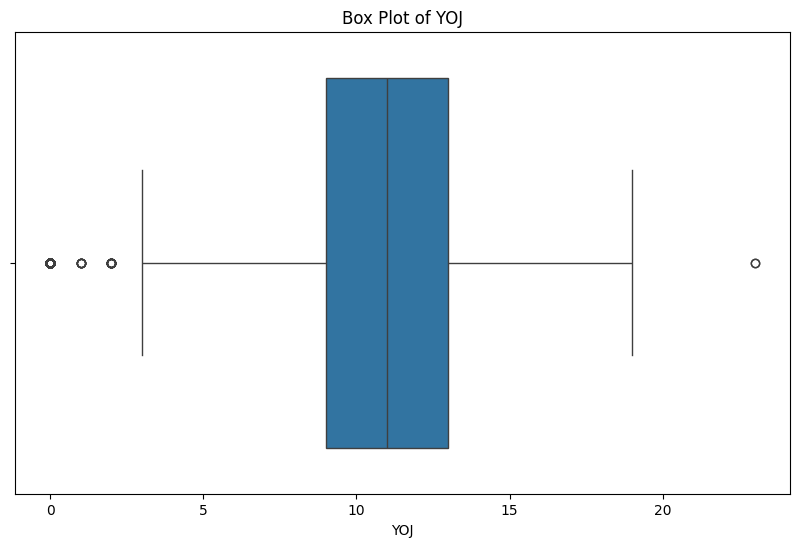

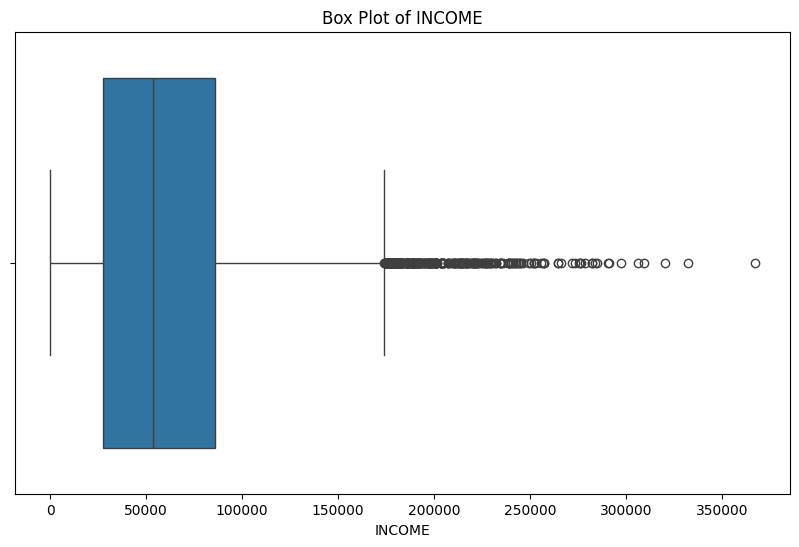

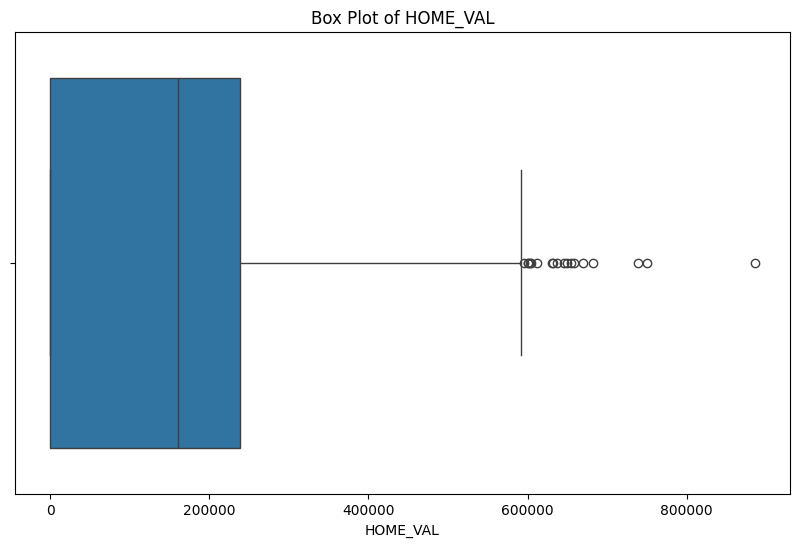

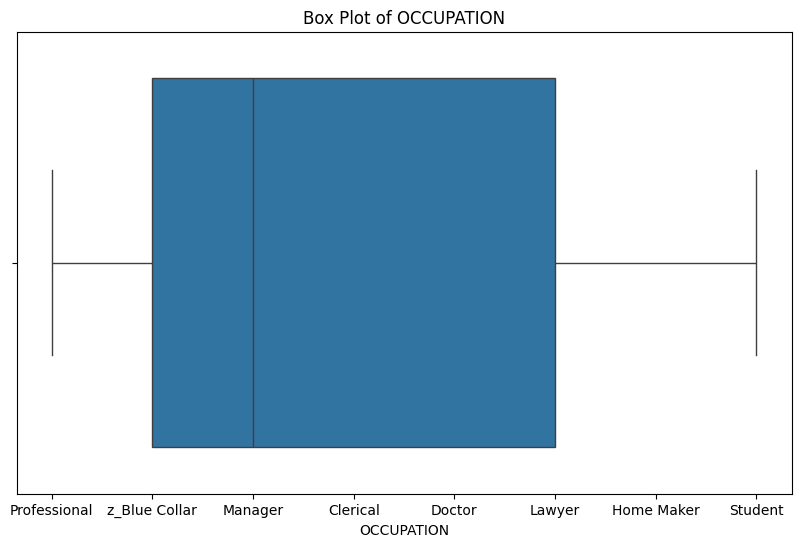

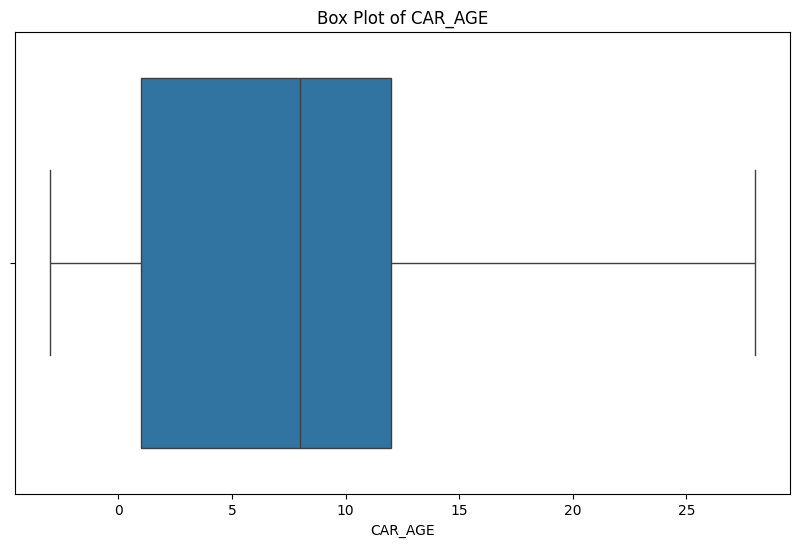

In [320]:
#Checking is their any outliers in null coloumns
null_columns = df.columns[df.isnull().any()]
for column in null_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

As we see that we have outlier in YOJ, Income, and Home_val coloumn so will do median imputation for this, and for Car_age we will use KNN imputer, and for Occupation will go for mode imputation.

In [321]:
df.isnull().sum()

KIDSDRIV        0
AGE             0
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

IMPUTATION OF NULL VLAUES

In [323]:
from sklearn.impute import KNNImputer

#Imputing YOJ, INCOME, and HOME_VAL with the median
df['YOJ'] = df['YOJ'].fillna(df['YOJ'].median())
df['INCOME'] = df['INCOME'].fillna(df['INCOME'].median())
df['HOME_VAL'] = df['HOME_VAL'].fillna(df['HOME_VAL'].median())

#Imputing CAR_AGE using KNN imputer
knn_columns = ['CAR_AGE']
knn_imputer = KNNImputer(n_neighbors=5)
df[knn_columns] = knn_imputer.fit_transform(df[knn_columns])

#Imputing OCCUPATION with the mode
mode_value = df['OCCUPATION'].mode()[0]
df['OCCUPATION'] = df['OCCUPATION'].fillna(mode_value)

In [324]:
df.isnull().sum()

KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

In [325]:
df.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,No,0.0,z_No,M,PhD,...,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban
1,0,43.0,0,11.0,91449.0,No,257252.0,z_No,M,z_High School,...,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,0,48.0,0,11.0,52881.0,No,0.0,z_No,M,Bachelors,...,Van,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban
3,0,35.0,1,10.0,16039.0,No,124191.0,Yes,z_F,z_High School,...,z_SUV,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban
4,0,51.0,0,14.0,53529.0,No,306251.0,Yes,M,<High School,...,Minivan,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban


In [326]:
df.duplicated().sum()

1

In [327]:
df.drop_duplicates(inplace=True)

In [328]:
df.duplicated().sum()

0

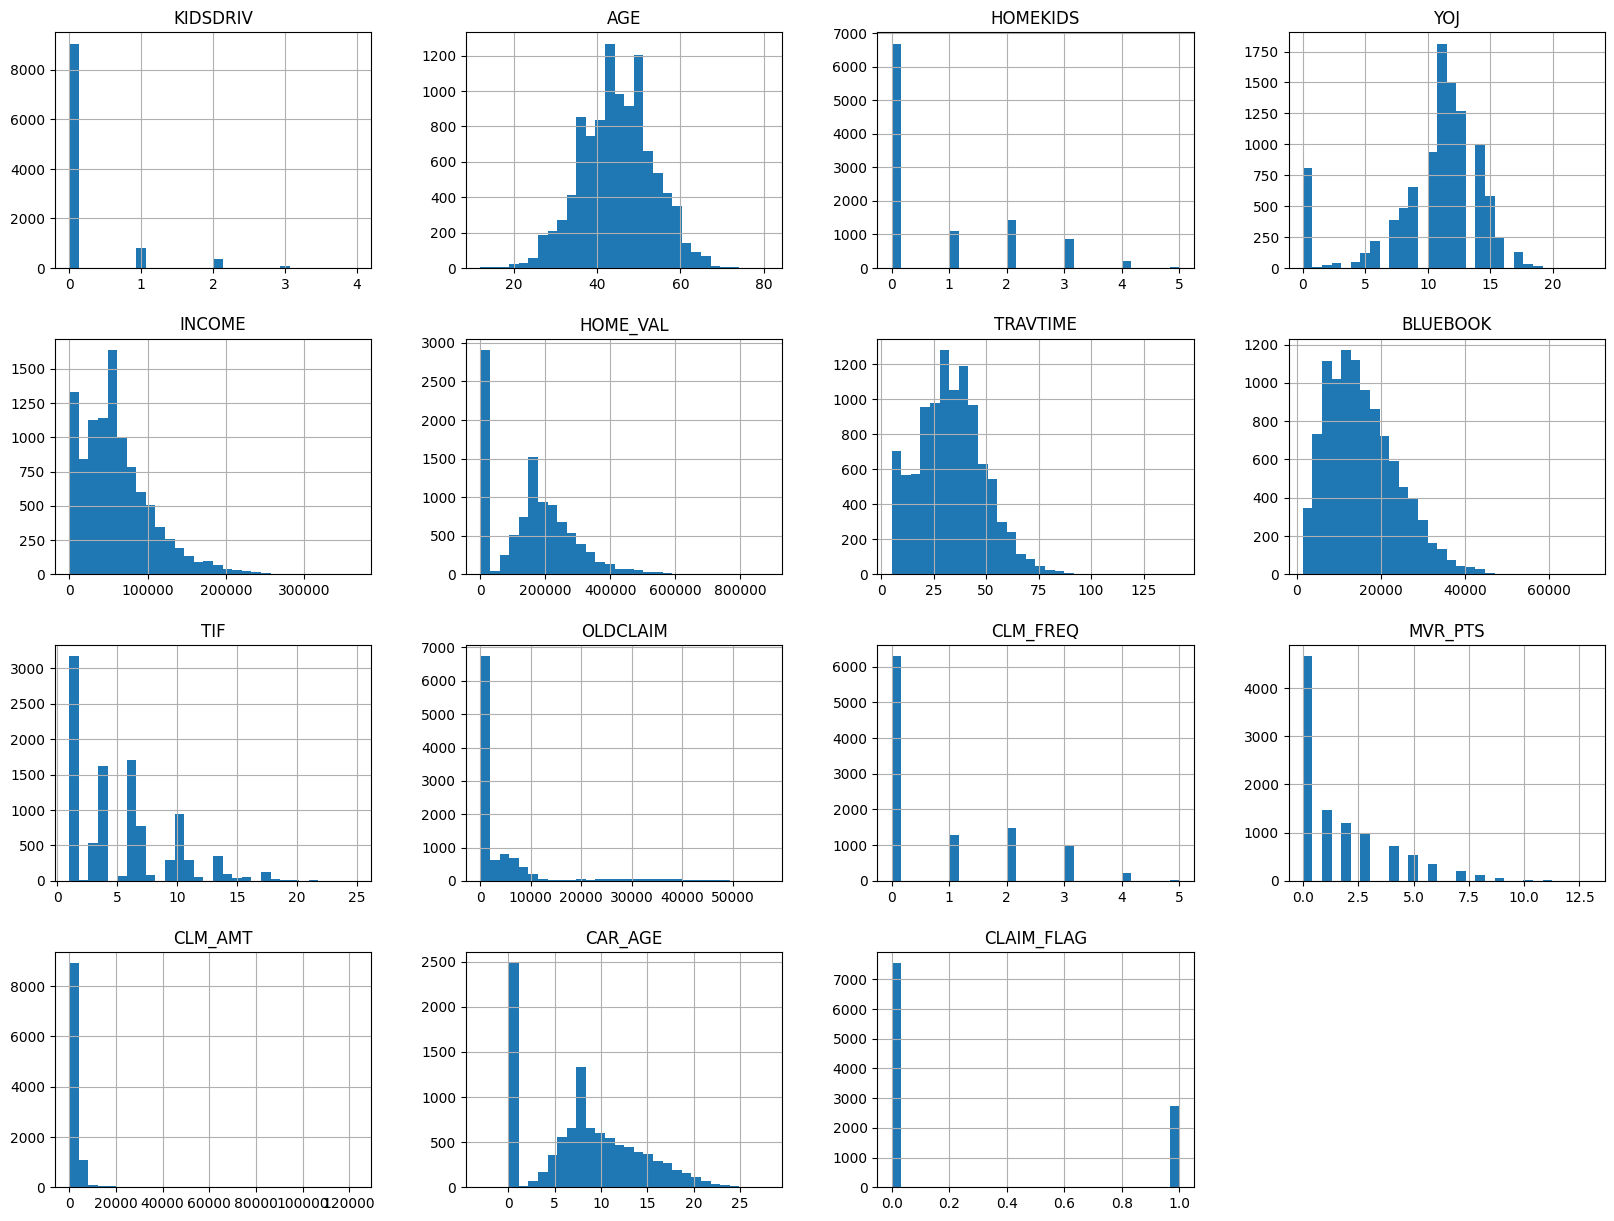

In [329]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

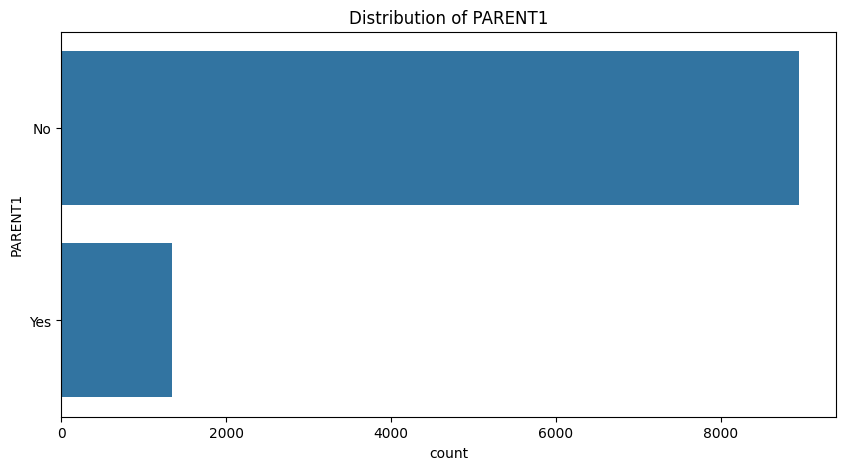

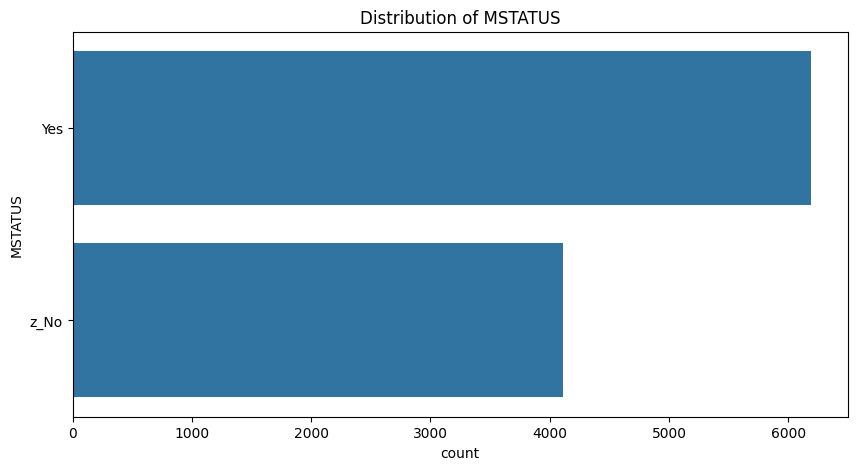

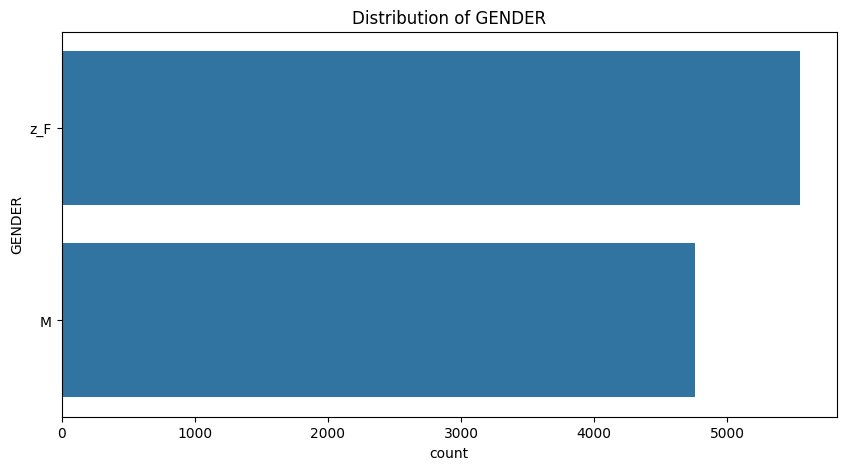

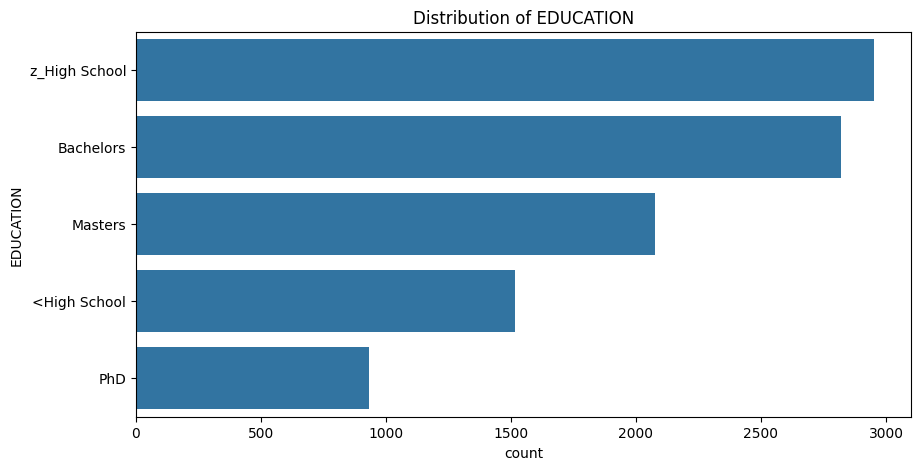

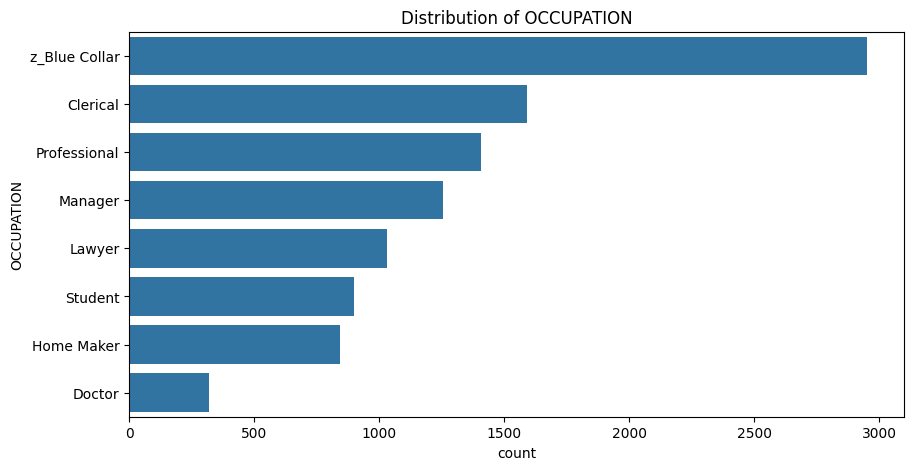

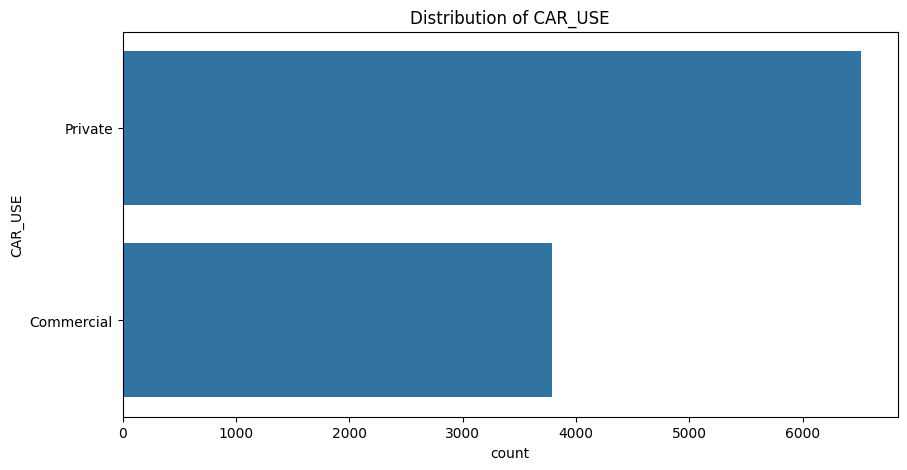

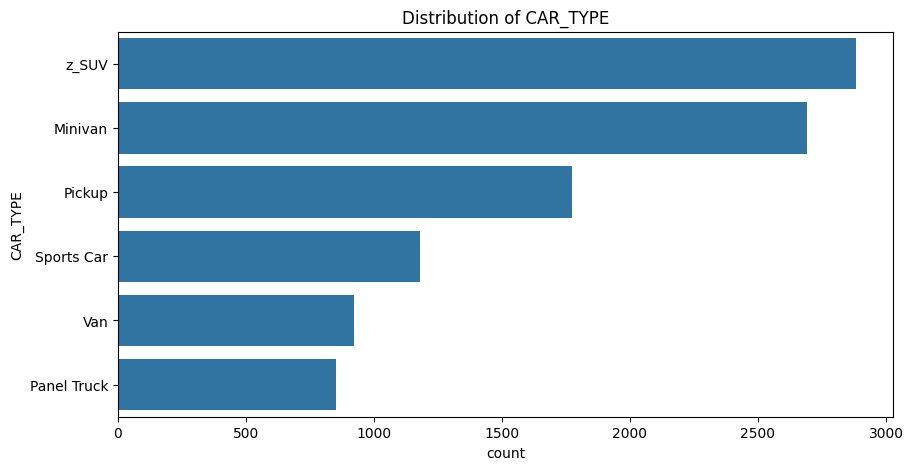

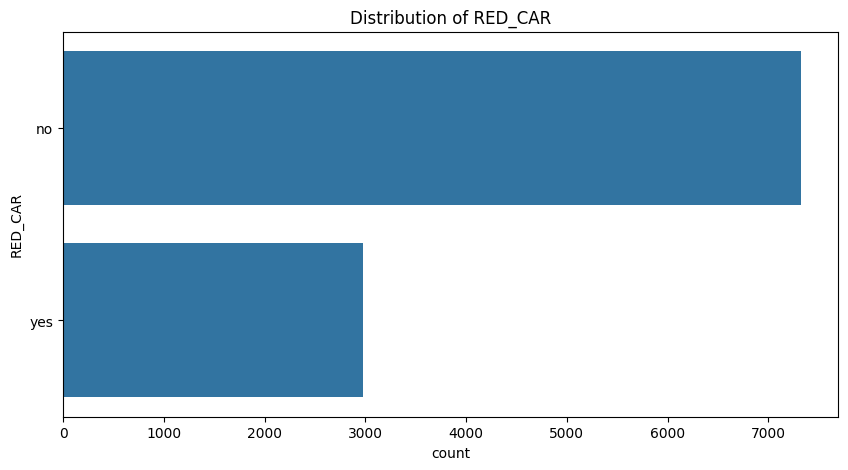

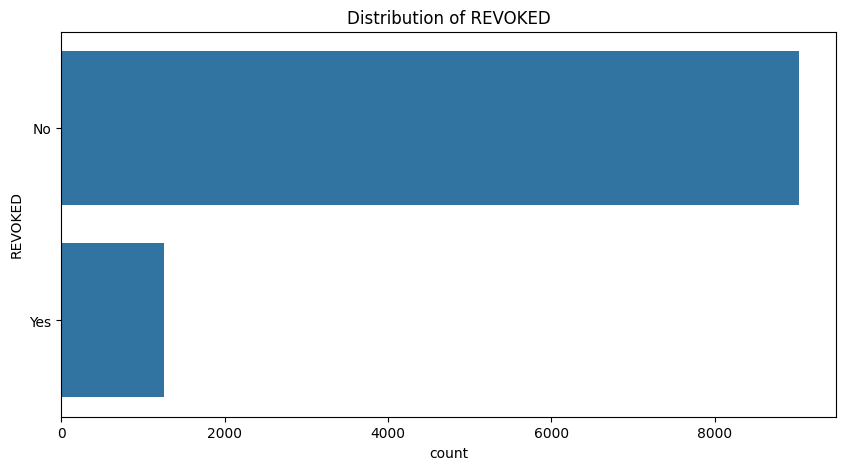

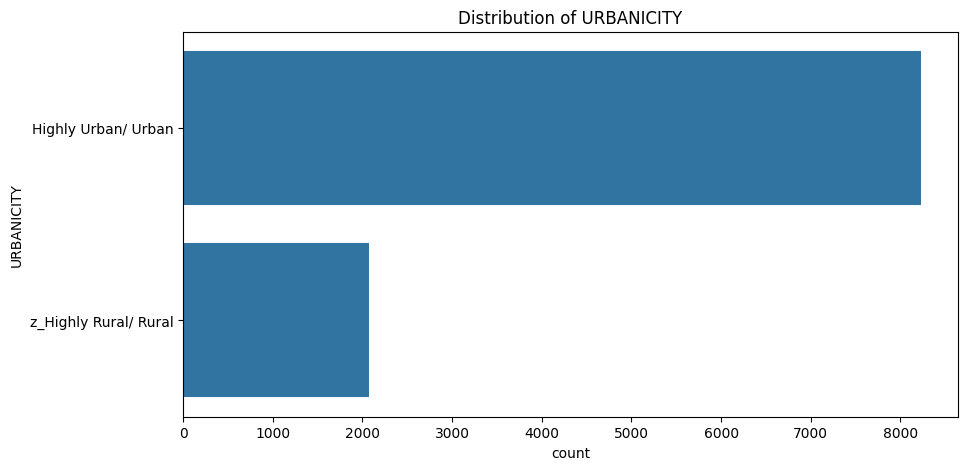

In [330]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

Insights from above EDA
* As most of the values in kidsdrive and homekids are 0, majority of policyholders do not have kids who drive and homekids.
* Age follows a Normal distribution, and it is centered around middle age i.e., (40-60 years), indicates most of the policyholders are of middle age.
* YOJ is slightly right-skewed, with a peak around 10-15 years, that means most of them have been in their jobs for about 10-15 years.
* Income distribution is right-skewed, indicating that most of them have a lower income, with a few earning significantly more.
* Home_Val distribution also right-skewed with several high-value outliers, indicating most homes have lower values, and only a few homes with very high-value.
* And Travel time distribution follows a normal distribution with centered around 30-60 minutes, that means most of them have moderate travel time.
* Bluebook is right-skewed, indicating most of the cars are lower valued, and only a few are of high-value cars.
* TIF (Tenure in Force) is also skewed towards lower values, means most of them have with insurer for shorter duration.
* In oldclaims majority of values are 0, means most of them do not have previous claims.
* In clm_freq also majority of values are 0, indicating that most of them do not frequently file claims.
* In MVR_PTS (Motor Vehicle Record Points) most of the values are 0, indicating that most policyholders have no points on their driving record.
* CLM_AMT (Claim Amount) distribution is highly right-skewed with most values at 0 and a few of them with very high outliers, that means majority of them do not claim any amount.
* Car_age is right-skewed with a significant number of very new cars with a spike around 0 years and another smaller peak around 10 years.
* Claim_flag follows a binary distribution with a higher count of 0s compared to 1s, means most of them do not file claims.
* We have more imbalanced data in PARENT1, RED_CAR, REVOKED, and URBANICITY COLOUMNS.

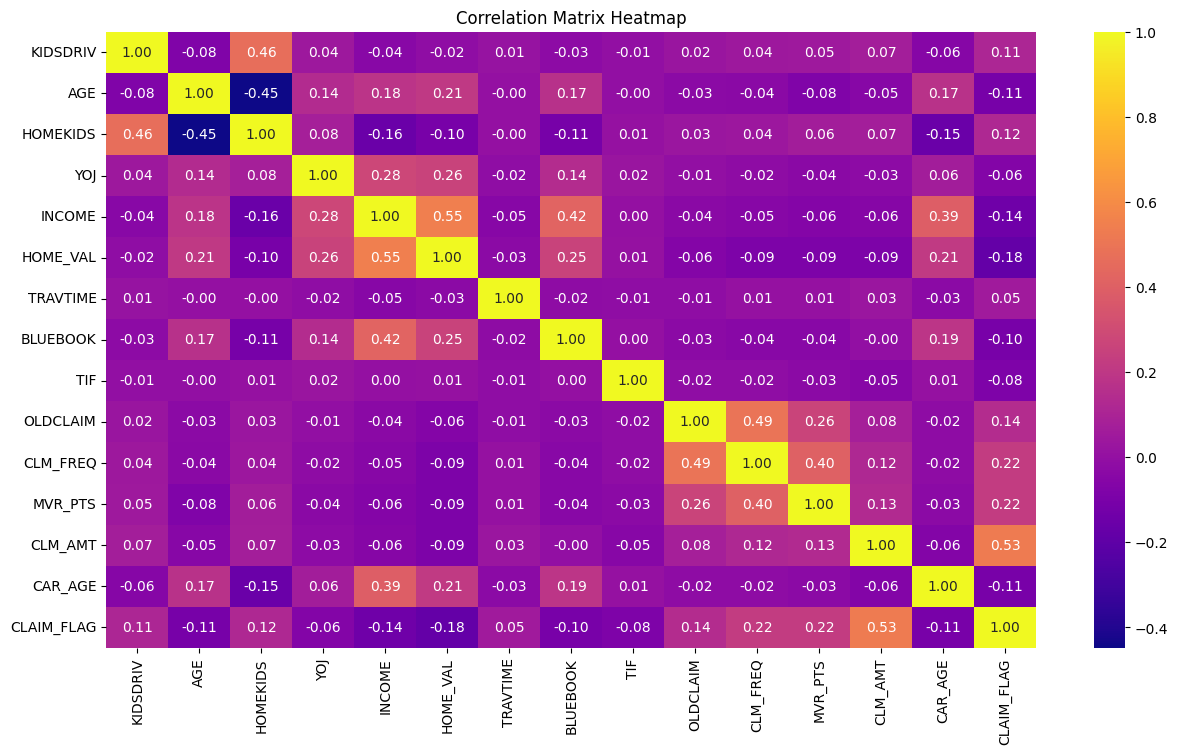

In [331]:
#Checking co relation
num_columns = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_columns.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap="plasma", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

FROM THE ABOVE CORR MATRIX WE CAN SEE THAT BLUEBOOKK COLOUMN IS VERY LESS CO-RELATED TO CLM_AMOUNT, SO WE CAN DROP THIS COLOUMN

In [332]:
df.drop(columns=['BLUEBOOK'], inplace=True)

In [333]:
df.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,No,0.0,z_No,M,PhD,...,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban
1,0,43.0,0,11.0,91449.0,No,257252.0,z_No,M,z_High School,...,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,0,48.0,0,11.0,52881.0,No,0.0,z_No,M,Bachelors,...,Van,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban
3,0,35.0,1,10.0,16039.0,No,124191.0,Yes,z_F,z_High School,...,z_SUV,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban
4,0,51.0,0,14.0,53529.0,No,306251.0,Yes,M,<High School,...,Minivan,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban


CHECKING AND HANDLING OUTLIERS

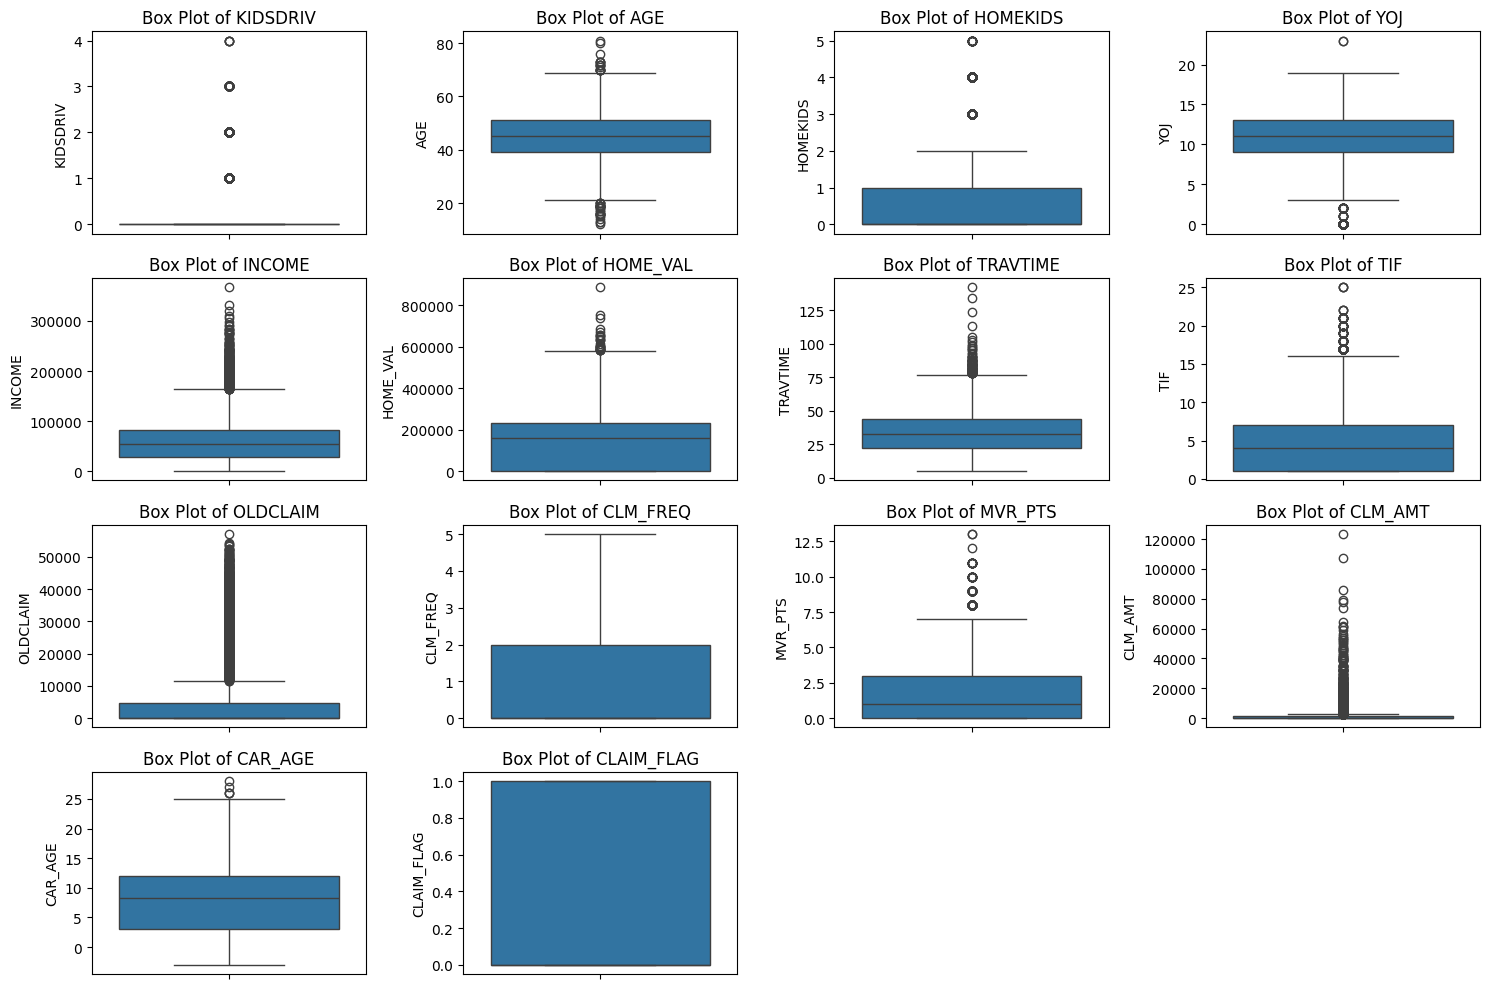

In [334]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=col, data=df)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

The Outlier coloumns are:
- KIDSDRIV
- AGE
- HOMEKIDS
- YOJ
- INCOME
- HOME_VAL
- TRAVTIME
- TIF
- OLD CLAIM
- MVR_PTS
- CLM_AMT

In [336]:
# Function to impute outliers using the median
def Outlier(data, colomn):
    Q1 = data[colomn].quantile(0.25)
    Q3 = data[colomn].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[colomn] = data[colomn].clip(lower_bound, upper_bound)

In [225]:
outlier_coloumn = ["KIDSDRIV", "AGE", "HOMEKIDS", "YOJ", "INCOME", "HOME_VAL", "TRAVTIME", "TIF", "OLDCLAIM", "MVR_PTS", "CLM_AMT"]
for j in outlier_coloumn:
    Outlier(df, j)

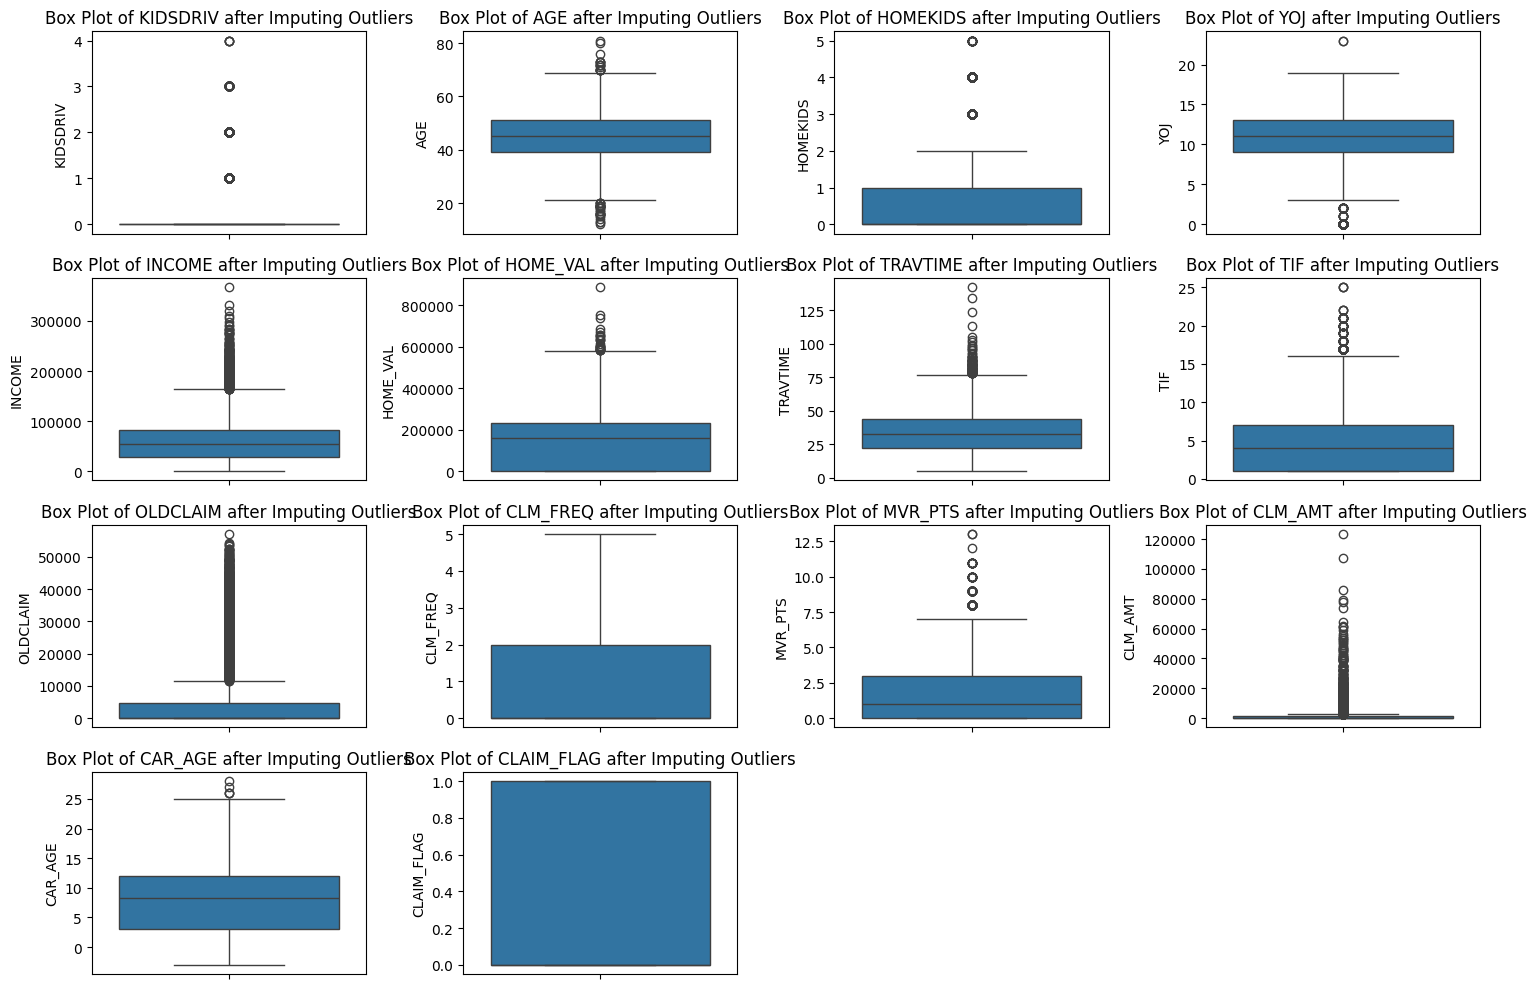

In [337]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=col, data=df)
    plt.title(f'Box Plot of {col} after Imputing Outliers')
plt.tight_layout()
plt.show()

SKEWNESS CHECKING AND CORRECTION

In [338]:
skewness = df[numerical_cols].apply(lambda x: skew(x.dropna()))
skewness

KIDSDRIV      3.342179
AGE          -0.058046
HOMEKIDS      1.336337
YOJ          -1.253045
INCOME        1.221003
HOME_VAL      0.498133
TRAVTIME      0.435369
TIF           0.899193
OLDCLAIM      3.119121
CLM_FREQ      1.193745
MVR_PTS       1.340186
CLM_AMT       9.294698
CAR_AGE       0.289438
CLAIM_FLAG    1.055814
dtype: float64

In [339]:
df_transformed = df.copy()

In [341]:
#Functions for applying log transformation
def double_log_transform(x):
    return np.log1p(np.log1p(x))

def triple_log_transform(x):
    return np.log1p(np.log1p(np.log1p(x)))

In [342]:
#As per the skewness values, applying square root, log, double log, and triple log transformation for the skewness coumns
df_transformed['HOMEKIDS'] = double_log_transform(df_transformed['HOMEKIDS'])
df_transformed['YOJ'] = np.sqrt(df_transformed['YOJ'])
df_transformed['INCOME'] = np.log1p(df_transformed['INCOME'])
df_transformed['HOME_VAL'] = np.sqrt(df_transformed['HOME_VAL'])
df_transformed['TRAVTIME'] = np.sqrt(df_transformed['TRAVTIME'])
df_transformed['TIF'] = double_log_transform(df_transformed['TIF'])
df_transformed['OLDCLAIM'] = triple_log_transform(df_transformed['OLDCLAIM'])
df_transformed['CLM_FREQ'] = double_log_transform(df_transformed['CLM_FREQ'])
df_transformed['MVR_PTS'] = double_log_transform(df_transformed['MVR_PTS'])
df_transformed['CLM_AMT'] = double_log_transform(df_transformed['CLM_AMT'])
df_transformed['CAR_AGE'] = np.sqrt(df_transformed['CAR_AGE'])
df_transformed['CLAIM_FLAG'] = double_log_transform(df_transformed['CLAIM_FLAG'])

c:\Users\Jameel Ahamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [343]:
df_transformed.isnull().sum()

KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       1
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

In [344]:
df_transformed.dropna(inplace=True)

ENCODING CATEGORICAL VARIABLES

In [350]:
X = df_transformed.drop(columns=["CLM_AMT"])
y = df_transformed["CLM_AMT"]

In [351]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE',
       'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY'],
      dtype='object')

In [352]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

education_categories = ["<High School", "z_High School", "Bachelors", "Masters", "PhD"]
OE = OrdinalEncoder(categories=[education_categories], handle_unknown='use_encoded_value', unknown_value=-1)
X['EDUCATION'] = OE.fit_transform(X[['EDUCATION']])

occupation_categories = ["Home Maker", "Student","z_Blue Collar","Clerical","Manager","Professional","Lawyer","Doctor"]
OE2 = OrdinalEncoder(categories=[occupation_categories], handle_unknown='use_encoded_value', unknown_value=-1)
X['OCCUPATION'] = OE2.fit_transform(X[['OCCUPATION']])

car_type_categories = ["Panel Truck", "Van", "Pickup", "Minivan", "z_SUV", "Sports Car"]
OE3 = OrdinalEncoder(categories=[car_type_categories], handle_unknown='use_encoded_value', unknown_value=-1)
X['CAR_TYPE'] = OE3.fit_transform(X[['CAR_TYPE']])

LE = LabelEncoder()
X['PARENT1'] = LE.fit_transform(X['PARENT1'].values.ravel())

LE2 = LabelEncoder()
X['MSTATUS'] = LE2.fit_transform(X['MSTATUS'].values.ravel())

LE3 = LabelEncoder()
X['GENDER'] = LE3.fit_transform(X['GENDER'].values.ravel())

LE4 = LabelEncoder()
X['CAR_USE'] = LE4.fit_transform(X['CAR_USE'].values.ravel())

LE5 = LabelEncoder()
X['RED_CAR'] = LE5.fit_transform(X['RED_CAR'].values.ravel())

LE6 = LabelEncoder()
X['REVOKED'] = LE6.fit_transform(X['REVOKED'].values.ravel())

LE7 = LabelEncoder()
X['URBANICITY'] = LE7.fit_transform(X['URBANICITY'].values.ravel())

In [353]:
X.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0.000000,3.316625,11.117658,0,0.000000,1,0,4.0,...,1.248441,3.0,1,1.175902,0.741276,0,0.869742,4.242641,0.0,0
1,0,43.0,0.000000,3.316625,11.423548,0,507.200158,1,0,1.0,...,0.526589,3.0,1,0.000000,0.000000,0,0.000000,1.000000,0.0,0
2,0,48.0,0.000000,3.316625,10.875818,0,0.000000,1,0,2.0,...,0.526589,1.0,1,0.000000,0.000000,0,0.741276,3.162278,0.0,0
3,0,35.0,0.526589,3.162278,9.682841,0,352.407435,0,1,1.0,...,0.959135,4.0,0,1.237748,0.741276,0,0.869742,3.162278,0.0,0
4,0,51.0,0.000000,3.741657,10.887998,0,553.399494,0,0,0.0,...,1.124748,3.0,1,0.000000,0.000000,0,0.000000,2.449490,0.0,0


In [354]:
X.dtypes

KIDSDRIV        int64
AGE           float64
HOMEKIDS      float64
YOJ           float64
INCOME        float64
PARENT1         int32
HOME_VAL      float64
MSTATUS         int32
GENDER          int32
EDUCATION     float64
OCCUPATION    float64
TRAVTIME      float64
CAR_USE         int32
TIF           float64
CAR_TYPE      float64
RED_CAR         int32
OLDCLAIM      float64
CLM_FREQ      float64
REVOKED         int32
MVR_PTS       float64
CAR_AGE       float64
CLAIM_FLAG    float64
URBANICITY      int32
dtype: object

FEATURE SCALING         

In [355]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [356]:
type(X)

numpy.ndarray

In [357]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [358]:
#Function for checking the evaluation score for different models and different preprocessed data sets
def select_model(X, y, algorithm):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = algorithm().fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    #Checking Evaluation Metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)

    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    metrics_train = {"Data": "Train Data",
                     "Name" : algorithm.__name__,
                     "R2_score" : train_r2,
                     "Mean_Squared_Error" : train_mse,
                     "Root Mean-Squared Error" : train_rmse,
                     "Mean_Absolute_Error" : train_mae}
    
    metrics_test = {"Data" : "Test Data",
                    "Name" : algorithm.__name__,
                    "R2-Score" : test_r2,
                    "Mean_Squared_Error" : test_mse,
                    "Root_Mean_Squared_Error" : test_rmse,
                    "Mean_absolute_error" : test_mae}
    
    print(metrics_train)
    print(metrics_test)
    print("")

In [359]:
select_model(X, y, LinearRegression)
select_model(X,y, DecisionTreeRegressor)
select_model(X,y, RandomForestRegressor)
select_model(X,y, GradientBoostingRegressor)
select_model(X,y, ExtraTreesRegressor)
select_model(X,y, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.9978900382167747, 'Mean_Squared_Error': 0.0020439856520559864, 'Root Mean-Squared Error': 0.04521045954263224, 'Mean_Absolute_Error': 0.01843154106293707}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2-Score': 0.9977842678610788, 'Mean_Squared_Error': 0.0021458089766694904, 'Root_Mean_Squared_Error': 0.04632287746534632, 'Mean_absolute_error': 0.018654986723016204}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 1.0, 'Mean_Squared_Error': 0.0, 'Root Mean-Squared Error': 0.0, 'Mean_Absolute_Error': 0.0}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2-Score': 0.9956031200914831, 'Mean_Squared_Error': 0.004258124983296493, 'Root_Mean_Squared_Error': 0.06525431007448085, 'Mean_absolute_error': 0.025000077305616784}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9996869662384776, 'Mean_Squared_Error': 0.0003032455479751302, 'Root Mean-Squared Error': 0.017413946938

CONCLUSION:

FROM THE ABOVE RESULTS RANDOM FOREST REGRESSOR ALGORITHM GIVES US THE BEST, SO WE CAN TUNE THE HYPERPARAMETRES OF RANDOM FOREST ALGORITHMS AND TRAIN OUR MODELS BASED ON THAT TO GIVE US MORE BETTER RESULTS

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'bootstrap': [True, False]
}

rfr = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [361]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [362]:
grid_search.best_score_

-0.0021147654018775367

In [363]:
RF_Model = grid_search.best_estimator_
y_pred = RF_Model.predict(X_test)

In [368]:
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", root_mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R² Score: 0.9977610321171425
Mean Squared Error: 0.0021683114565686583
Root Mean Squared Error: 0.04656513133846675
Mean Absolute Error: 0.01687472329963882


In [365]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(RF_Model, f)